In [1]:
"""
The project aims to predict the sales at Big Mart.
The demo code below shows predictions based on Scikit-Learn Linear Regression function.
...Improve the model accuracy by including extra hyperparameters on the model below, engineering new features,
using alternate regression models such as Lasso or Ridge Regression.
...May the best coder win.
"""
# linear algebra operations
import numpy as np 
# data handling processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 
#Data visualization
import matplotlib.pyplot as plt
#Correlation analysis and data visualization toolbox.
import seaborn as sns
#Popular ML framework and library.
from sklearn.linear_model import LinearRegression

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
# import data
train = pd.read_csv("Train_big_mart.csv")

#checking information on the data
#we see we have 12 columns and they are of various data types
#we also note that all the other columns have 8523 rows apart from Item_weight & Outlet size
#Less rows means missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [3]:
#filling null values with the mean

# mark null values as missing or NaN
#train[['Item_Weight']]=train[['Item_Weight']].replace(train[['Item_Weight']].isnull(), np.NaN)


train.fillna(train.mean(), inplace=True)
train[['Item_Weight']].isnull().sum()
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#show number of missing values
train[['Outlet_Size']].isnull().sum()

Outlet_Size    2410
dtype: int64

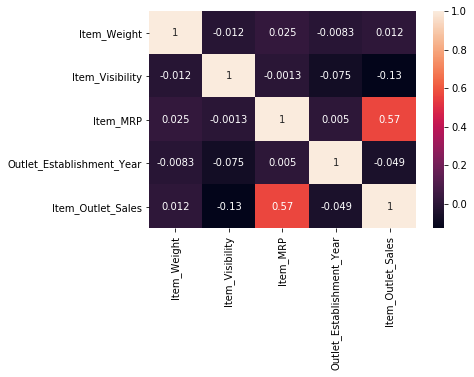

In [5]:
#Realation of the varoius features to the target
#We can only see relations of numerical features
#Our target is Item_Outlet_sales,Item_MRP seems to have the strongest corelation
sns.heatmap(train.corr(),annot=True)

#Checking Realation Of the object data types to the Target

In [6]:
#From below we can see that the item ids are in categories
#thus we shall convert this column to categorical data
train.Item_Identifier.value_counts()

FDW13    10
FDG33    10
FDV60     9
NCB18     9
NCI54     9
NCJ30     9
FDQ40     9
NCL31     9
FDG09     9
FDP25     9
DRN47     9
FDX04     9
NCF42     9
FDX20     9
NCQ06     9
FDF52     9
FDW26     9
FDD38     9
FDU12     9
DRE49     9
FDO19     9
FDV38     9
FDX31     9
FDF56     9
FDW49     9
FDT07     9
NCY18     9
FDD05     8
FDO52     8
FDH27     8
         ..
NCW30     2
FDR03     2
NCS41     2
DRI59     2
FDI36     2
FDB47     2
FDE39     2
DRE01     2
NCV18     2
FDE38     2
FDW10     2
FDP15     2
FDF38     2
FDM38     2
FDR57     2
FDW58     2
FDH22     2
DRC24     2
FDT33     2
FDU09     2
NCG19     2
FDY43     1
DRF48     1
FDK57     1
FDE52     1
FDN52     1
FDO33     1
FDT35     1
FDQ60     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [7]:
#from the out put we see we have five categories
#2 majour categories and 3 minor ones
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
#Arbsorbing the minor categories into the majour ones
#LF & low fat will be put in the Low Fat category
#reg will be put in the regular category
train.Item_Fat_Content=train.Item_Fat_Content.replace('LF','Low Fat')
train.Item_Fat_Content=train.Item_Fat_Content.replace('low fat','Low Fat')
train.Item_Fat_Content=train.Item_Fat_Content.replace('reg','Regular')

#confirming if the above was executed
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

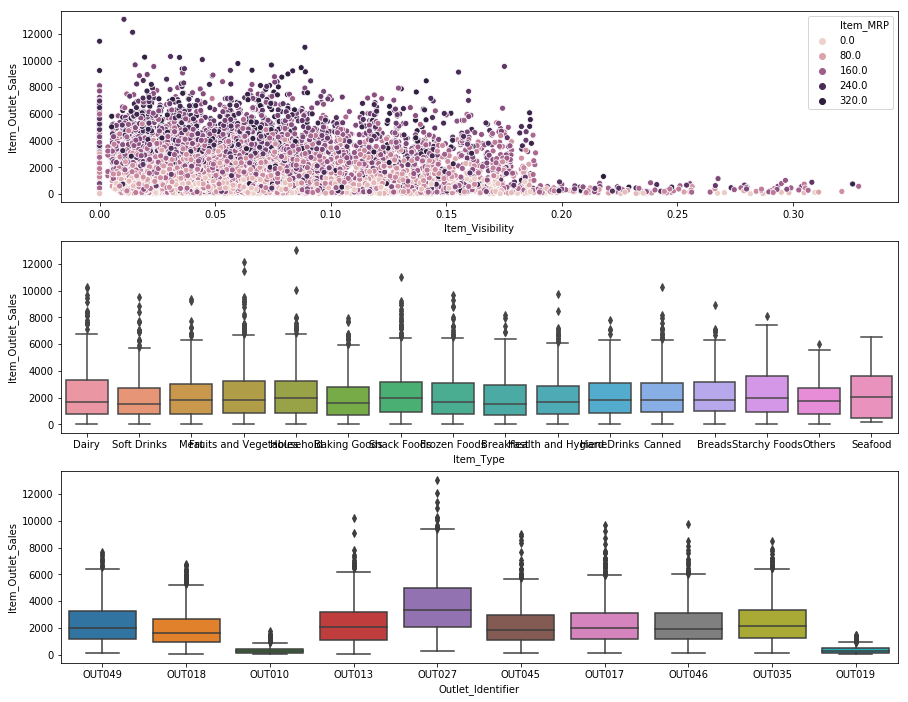

In [9]:
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=train)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=train)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=train)

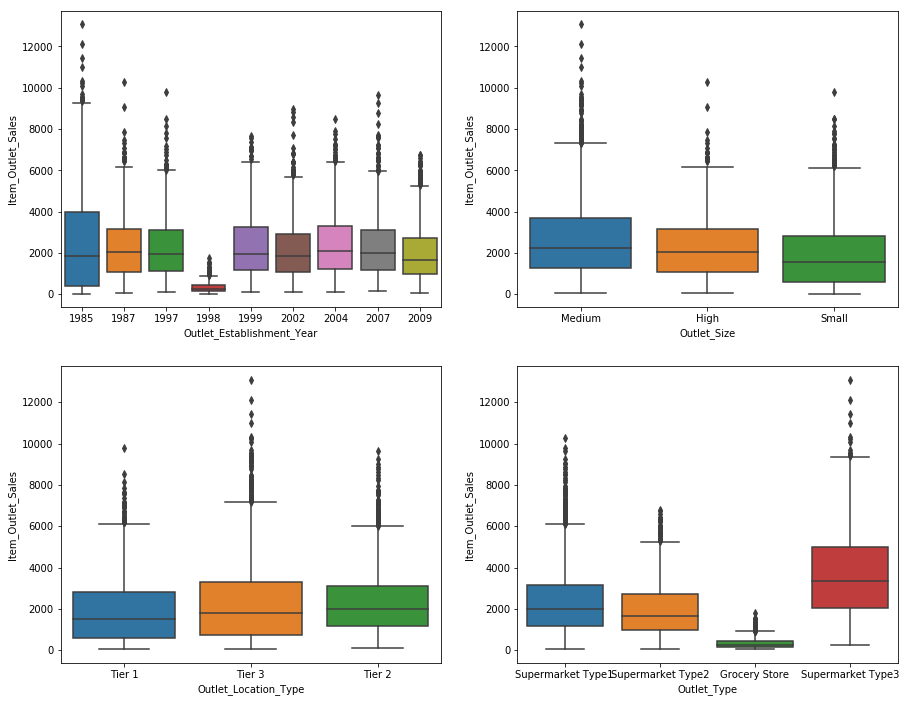

In [51]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=train)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=train)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=train)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=train)

In [8]:
#from above Item_weight and Outlet_size had missing values
#lets fill in the missing values with their mean


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

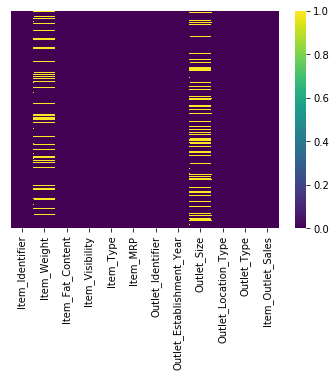

In [10]:
#visualizing the data to detect missing values
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [11]:
#Fill in the missing values in the Out_let size column.
train.Outlet_Size = train.Outlet_Size.fillna('Medium')
train.Outlet_Size.head()

0    Medium
1    Medium
2    Medium
3    Medium
4      High
Name: Outlet_Size, dtype: object

In [12]:
#Missing values in the Item_Weight column are filled by the mean value.
train.Item_Weight = train.Item_Weight.fillna(12.86)
train.Item_Weight.head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

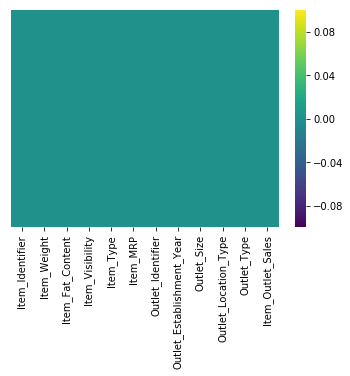

In [13]:
#visualizing the data to detect missing values
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

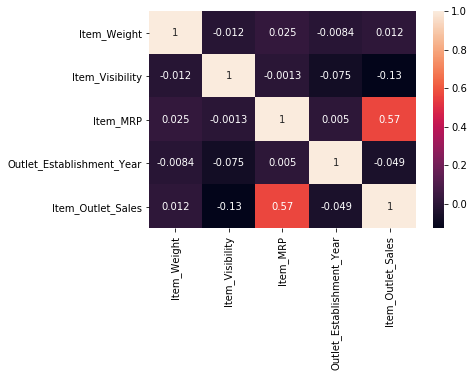

In [14]:
corr = train.corr()
sns.heatmap(corr, annot=True)

In [15]:
#Changing categorical data(Outlet_Location_Type) to numerical data.
train["Outlet_Location_Type"] = pd.Categorical(train["Outlet_Location_Type"])
Outlet_Location_Type_categories = train.Outlet_Location_Type.cat.categories
train["Outlet_Location_Type"] = train.Outlet_Location_Type.cat.codes
train.Outlet_Location_Type.head()

0    0
1    2
2    0
3    2
4    2
Name: Outlet_Location_Type, dtype: int8

In [18]:
#Changing categorical data(Outlet_Size) to numerical data.
train["Outlet_Size"] = pd.Categorical(train["Outlet_Size"])
Outlet_Size_categories = train.Outlet_Size.cat.categories
train["Outlet_Size"] = train.Outlet_Size.cat.codes
train.Outlet_Size.head()


0    1
1    1
2    1
3    1
4    0
Name: Outlet_Size, dtype: int8

In [21]:
#checking whether the columns were converted to numerical data
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.858049,0.066132,140.992782,1997.831867,1.170832,1.112871,2181.288914
std,4.226124,0.051598,62.275067,8.371760,0.600327,0.812757,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,0.000000,0.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,1.000000,0.000000,834.247400
50%,12.860000,0.053931,143.012800,1999.000000,1.000000,1.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,2.000000,2.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,2.000000,2.000000,13086.964800


In [24]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [38]:
#Preparing the data for cross-Validation and selecting the features used in training.
train_data = train[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type','Item_Outlet_Sales']]

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
Item_Weight                  8523 non-null float64
Item_Visibility              8523 non-null float64
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int8
Outlet_Location_Type         8523 non-null int8
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), int8(2)
memory usage: 349.7 KB


In [28]:
from sklearn.model_selection import train_test_split


In [36]:
Train,Test = train_test_split(Y,test_size=0.20,random_state=1500)

In [37]:
Train.shape, Test.shape

((6818, 1), (1705, 1))

In [32]:
Train_label=Train['Item_Outlet_Sales']
Test_label=Test['Item_Outlet_Sales']
del Train['Item_Outlet_Sales']
del Test['Item_Outlet_Sales']

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
#Give the regression function an easy name to use.
lr = LinearRegression()

In [35]:
#Train the model based on the training dataset.
lr.fit(Train,Train_label)

ValueError: could not convert string to float: 'FDP46'

In [ ]:
#View the model score using the validation dataset.
lr.score(x_cv,y_cv)

In [ ]:

pred = lr.predict(x_cv)

#calculating mse

mse = np.mean((pred - y_cv)**2)

In [ ]:
mse